In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
df_titanic = pd.read_csv('/content/Titanic-Dataset.csv')

HANDLING MISSING VALUES

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  607 non-null    int64  
 1   Survived     607 non-null    int64  
 2   Pclass       607 non-null    int64  
 3   Name         607 non-null    object 
 4   Sex          607 non-null    object 
 5   Age          607 non-null    float64
 6   SibSp        607 non-null    int64  
 7   Parch        607 non-null    int64  
 8   Ticket       607 non-null    object 
 9   Fare         607 non-null    float64
 10  Cabin        98 non-null     object 
 11  Embarked     607 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 61.6+ KB


In [ ]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.339415,1,0,A/5 21171,0.104618,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0.402328,0,0,STON/O2. 3101282,0.114358,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.543882,1,0,113803,0.766234,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.543882,0,0,373450,0.116162,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.842718,0,0,17463,0.748377,E46,S


In [ ]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())


In [ ]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [ ]:
df_titanic['Cabin'] = df_titanic['Cabin'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)


CONVERTING CATEGORICAL FEATURES INTO NUMERICAL

In [ ]:
le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])
df_titanic['Embarked'] = le.fit_transform(df_titanic['Embarked'])

In [15]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


NORMALIZING NUMERICAL FEATURES

In [10]:
numerical_cols = df_titanic.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [16]:
scaler = MinMaxScaler()
df_titanic[['Age','Fare']] = scaler.fit_transform(df_titanic[['Age','Fare']])

VISUALIZING USING BOXPLOT

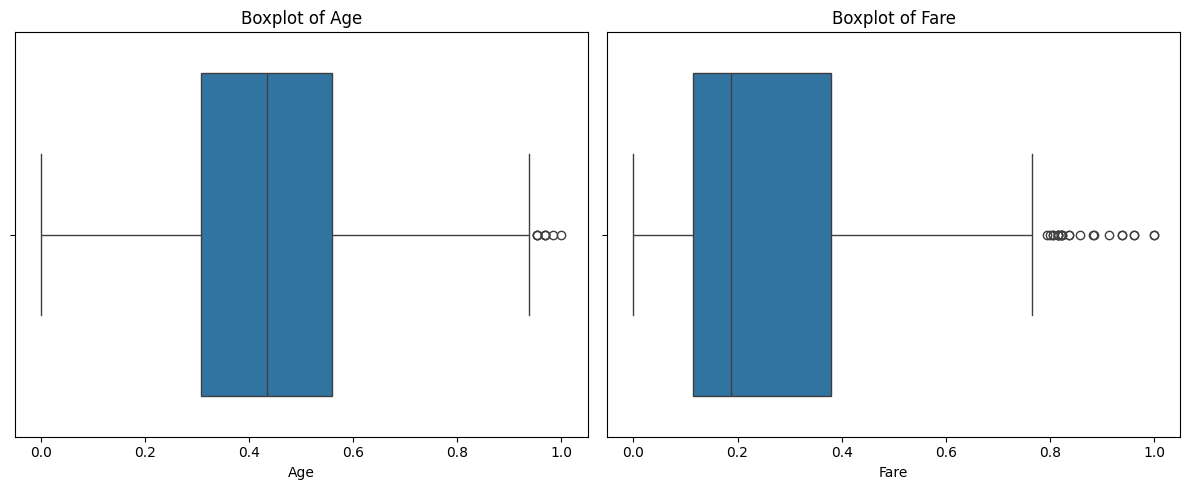

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

#  for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(x=df_titanic['Age'])
plt.title('Boxplot of Age')

#for fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df_titanic['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


REMOVING OUTLIERS

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_titanic = remove_outliers(df_titanic, 'Age')
df_titanic = remove_outliers(df_titanic, 'Fare')
